In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib.ticker import *

# load Data
ResultPath = '../50_Figure_Data/'

File=ResultPath+'R1_R2_R5_CF_MF_total_Trend.xlsx'

DF = pd.read_excel(File, sheet_name='CF',skiprows=1).set_index('Scenario')

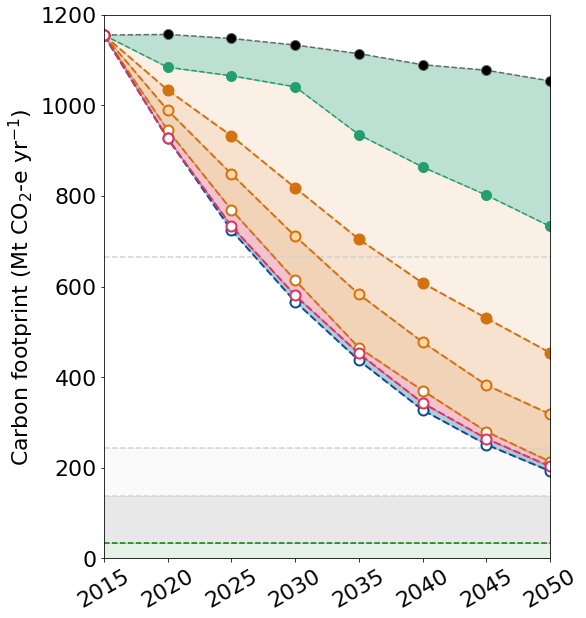

In [2]:
%matplotlib inline
# set plot area
fig_high = 10
fig_width = 8
fig, ax = plt.subplots(1,1,figsize=(fig_width,fig_high),
                               gridspec_kw=dict(width_ratios=[1],height_ratios=[1],
                                                wspace=0.30, hspace=0.30)) 

plt.rcParams['font.family'] = 'Arial'

#set initial
fontsize = 26
labelsize = 22

#set color
C_BaU = 'dimgrey'
C_RE = '#239e70'
C_DA = '#d37211'
C_MFT = '#dd335f'
C_ITP = '#0c508e'


## GHG Target
Target2030 = 0.665*1000 #MtCO2
Target2050 = 0.033*1000 #MtCO2
Target2050_CCS_min = Target2050 + 0.105*1000 #MtCO2
Target2050_CCS_max = Target2050 + 0.210*1000 #MtCO2
ax.hlines(Target2030,2015,2070,color='lightgrey',linestyle='--')
#ax.hlines(Target2050,2015,2050,color='lightgrey',linestyle='--')
ax.hlines(Target2050_CCS_min,2015,2070,color='lightgrey',linestyle='--')
ax.hlines(Target2050_CCS_max,2015,2070,color='lightgrey',linestyle='--')
ax.hlines(Target2050,2015,2070,color='green',linestyle='--')

### plot CF
x = DF.columns
y_BaU = DF.iloc[0,:]
y_DA_low = DF.iloc[1,:]
y_DA_middle = DF.iloc[2,:]
y_DA_high = DF.iloc[3,:]
y_MFT = DF.iloc[4,:]
y_ITP = DF.iloc[5,:]
y_BaU_RE = DF.iloc[6,:]

x_fill = [2015,2020,2025,2030,2035,2040,2045,2050]
ax.fill_between(x_fill, Target2050, Target2050_CCS_min, color='lightgrey', alpha=0.5)
ax.fill_between(x_fill, Target2050_CCS_min, Target2050_CCS_max, color='lightgrey', alpha=0.1)
ax.fill_between(x_fill, y_BaU, y_BaU_RE, color=C_RE, alpha=0.3)
ax.fill_between(x_fill, y_BaU_RE, y_DA_low, color=C_DA, alpha=0.1)
ax.fill_between(x_fill, y_DA_low, y_DA_middle, color=C_DA, alpha=0.2)
ax.fill_between(x_fill, y_DA_middle, y_DA_high, color=C_DA, alpha=0.3)
ax.fill_between(x_fill, y_MFT, y_DA_high, color=C_MFT, alpha=0.3)
ax.fill_between(x_fill, y_ITP, y_MFT, color=C_ITP, alpha=0.3)
ax.fill_between(x_fill, Target2050, color='green', alpha=0.1)

lw = 2.0
mew = 2.0
ax.plot(x,y_BaU,color=C_BaU,marker='o',linestyle='--',markersize=10,markerfacecolor='black')
ax.plot(x,y_BaU_RE,color=C_RE,marker='o',linestyle='--',markersize=10,markerfacecolor=C_RE)
ax.plot(x,y_DA_low,color=C_DA,marker='o',linestyle='--',linewidth=2,
        markersize=10,markeredgewidth=2,markerfacecolor=C_DA)
ax.plot(x,y_DA_middle,color=C_DA,marker='o',linestyle='--',linewidth=lw,
        markersize=10,markeredgewidth=mew,markerfacecolor='#ffd6a4')
ax.plot(x,y_DA_high,color=C_DA,marker='o',linestyle='--',linewidth=lw,
        markersize=10,markeredgewidth=mew,markerfacecolor='white')
ax.plot(x,y_ITP,color=C_ITP,marker='o',linestyle='--',linewidth=lw,
        markersize=10,markeredgewidth=mew,markerfacecolor='white')
ax.plot(x,y_MFT,color=C_MFT,marker='o',linestyle='--',linewidth=lw,
        markersize=10,markeredgewidth=mew,markerfacecolor='white')

# set figure elements
ax.set_xlim(2015,2050)
ax.set_ylim(0,1200)
ax.tick_params(labelsize=labelsize)
ax.set_xticks([2015,2020,2025,2030,2035,2040,2045,2050])
ax.set_xticklabels([2015,2020,2025,2030,2035,2040,2045,2050],rotation=30)
ax.set_ylabel('Carbon footprint (Mt CO$_2$-e yr$^{-1}$)', size=labelsize)


# Save figure
fig.savefig("../50_Figure_Data/MFT_R1.svg",
             format="svg", bbox_inches="tight", facecolor='white')

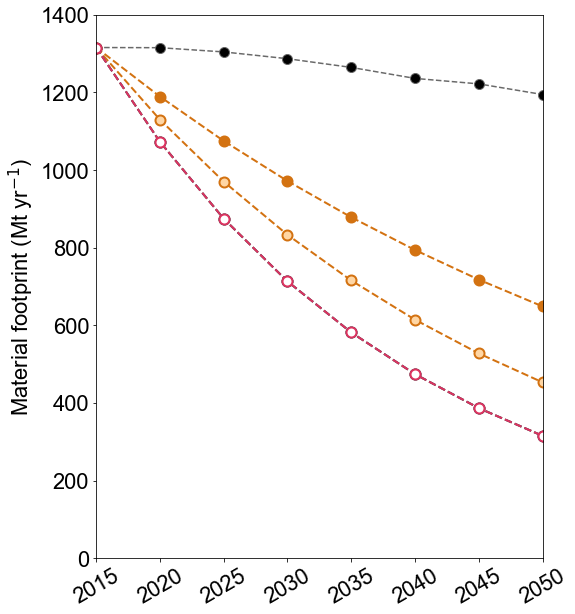

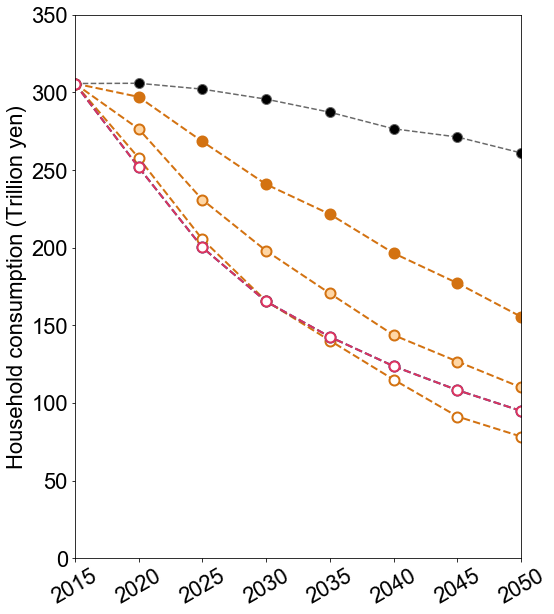

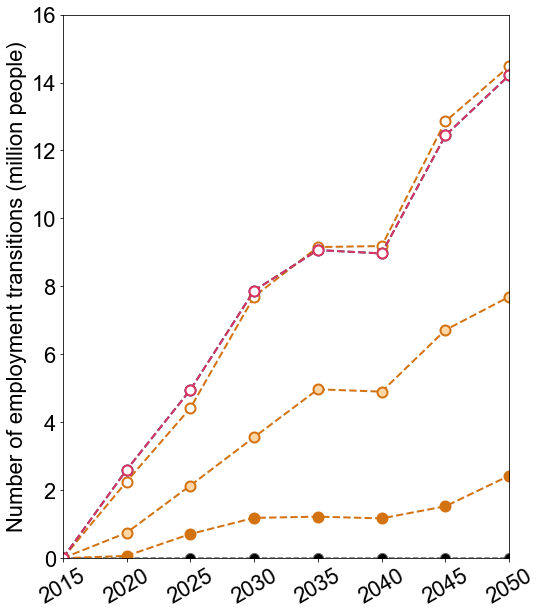

In [4]:
%matplotlib inline
# set plot area
fig_high = 10
fig_width = 8
fig1, ax1 = plt.subplots(1,1,figsize=(fig_width,fig_high),
                               gridspec_kw=dict(width_ratios=[1],height_ratios=[1],
                                                wspace=0.30, hspace=0.30)) 
fig2, ax2 = plt.subplots(1,1,figsize=(fig_width,fig_high),
                               gridspec_kw=dict(width_ratios=[1],height_ratios=[1],
                                                wspace=0.30, hspace=0.30)) 
fig3, ax3 = plt.subplots(1,1,figsize=(fig_width,fig_high),
                               gridspec_kw=dict(width_ratios=[1],height_ratios=[1],
                                                wspace=0.30, hspace=0.30)) 
def draw_LineBar(DF,ax):
    x = DF.columns
    y_BaU = DF.iloc[0,:] 
    y_DA_low = DF.iloc[1,:]
    y_DA_middle = DF.iloc[2,:]
    y_DA_high = DF.iloc[3,:]
    y_MFT = DF.iloc[4,:]
    y_ITP = DF.iloc[5,:]

    x_fill = [2015,2020,2025,2030,2035,2040,2045,2050]
    #ax.fill_between(x_fill, y_DA_low, y_BaU, color=C_DA, alpha=0.1)
    #ax.fill_between(x_fill, y_DA_middle, y_DA_low, color=C_DA, alpha=0.3)
    #ax.fill_between(x_fill, y_DA_high, y_DA_middle, color=C_DA, alpha=0.5)
    lw = 2.0
    mew = 2.0
    ax.plot(x,y_BaU,color=C_BaU,marker='o',linestyle='--',markersize=10,markerfacecolor='black')
    ax.plot(x,y_DA_low,color=C_DA,marker='o',linestyle='--',linewidth=2,
            markersize=10,markeredgewidth=2,markerfacecolor=C_DA)
    ax.plot(x,y_DA_middle,color=C_DA,marker='o',linestyle='--',linewidth=lw,
            markersize=10,markeredgewidth=mew,markerfacecolor='#ffd6a4')
    ax.plot(x,y_DA_high,color=C_DA,marker='o',linestyle='--',linewidth=lw,
            markersize=10,markeredgewidth=mew,markerfacecolor='white')
    ax.plot(x,y_ITP,color=C_ITP,marker='o',linestyle='--',linewidth=lw,
            markersize=10,markeredgewidth=mew,markerfacecolor='white')
    ax.plot(x,y_MFT,color=C_MFT,marker='o',linestyle='--',linewidth=lw,
            markersize=10,markeredgewidth=mew,markerfacecolor='white')
    
### plot MF
DF = pd.read_excel(File, sheet_name='MF',skiprows=1).set_index('Scenario')
ax = ax1
draw_LineBar(DF,ax)

### plot HC
DF = pd.read_excel(File, sheet_name='HC',skiprows=1).set_index('Scenario')
ax = ax2
draw_LineBar(DF,ax)

### plot ET
DF = pd.read_excel(File, sheet_name='ET',skiprows=1).set_index('Scenario')
ax = ax3
draw_LineBar(DF,ax)

# set figure elements
axes = [ax1,ax2,ax3]
for ax in axes:
    ax.set_xlim(2015,2050)
    ax.tick_params(labelsize=labelsize)
    ax.set_xticks([2015,2020,2025,2030,2035,2040,2045,2050])
    ax.set_xticklabels([2015,2020,2025,2030,2035,2040,2045,2050],rotation=30)

#MF    
ax1.set_ylim(0,1400)
ax1.set_ylabel('Material footprint (Mt yr$^{-1}$)', size=labelsize)
#ax1.set_title('Material footprint',fontsize=fontsize,loc='left')
#HC    
ax2.set_ylim(0,350)
ax2.set_ylabel('Household consumption (Trillion yen)', size=labelsize)
#ax2.set_title('Household consumption',fontsize=fontsize,loc='left')
#ET    
ax3.set_ylim(0,16)
ax3.set_ylabel('Number of employment transitions (million people)', size=labelsize)
#ax3.set_title('Employment transition',fontsize=fontsize,loc='left')

# Save figure
fig1.savefig("../50_Figure_Data/MFT_R2_MF.svg",
             format="svg", bbox_inches="tight", facecolor='white')
fig2.savefig("../50_Figure_Data/MFT_Ref_HC.svg",
             format="svg", bbox_inches="tight", facecolor='white')
fig3.savefig("../50_Figure_Data/MFT_R5_ET.svg",
             format="svg", bbox_inches="tight", facecolor='white')

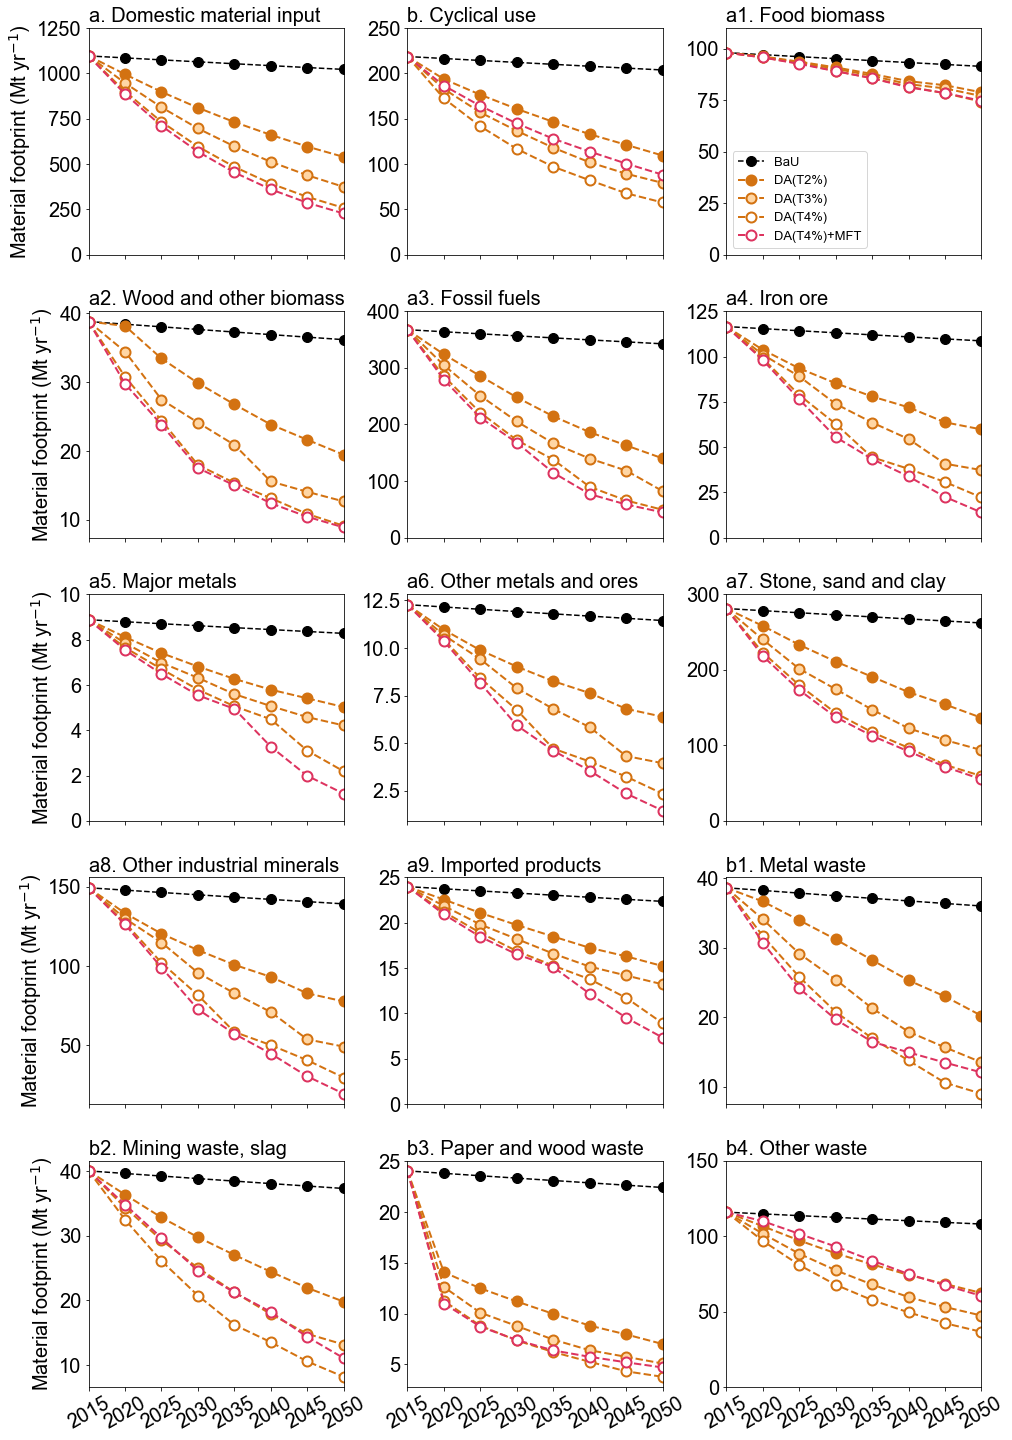

In [5]:
%matplotlib inline
# set plot area
fig_high = 25
fig_width = 16
fig, axes = plt.subplots(5,3,figsize=(fig_width,fig_high),
                               gridspec_kw=dict(width_ratios=[1,1,1],height_ratios=[1,1,1,1,1],
                                                wspace=0.25, hspace=0.25)) 

ax0 = axes[0][0]
ax1 = axes[0][1]
ax2 = axes[0][2]
ax3 = axes[1][0]
ax4 = axes[1][1]
ax5 = axes[1][2]
ax6 = axes[2][0]
ax7 = axes[2][1]
ax8 = axes[2][2]
ax9 = axes[3][0]
ax10 = axes[3][1]
ax11 = axes[3][2]
ax12 = axes[4][0]
ax13 = axes[4][1]
ax14 = axes[4][2]
axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14]


plt.rcParams['font.family'] = 'Arial'

#set initial
fontsize = 22
labelsize = 20

#set color
C_BaU = 'black'
C_DA = '#d37211'
#C_DA2 = 'lightgrey'
#C_DA3 = 'grey'
C_MFT = '#dd335f'
C_ITP = '#0c508e'

#load file
File=ResultPath+'R3_MF_Material.xlsx'
DF_BaU = pd.read_excel(File, sheet_name='BaU',skiprows=1).set_index('Material').drop('No',axis=1)
DF_DA_2 = pd.read_excel(File, sheet_name='DA_2',skiprows=1).set_index('Material').drop('No',axis=1)
DF_DA_3 = pd.read_excel(File, sheet_name='DA_3',skiprows=1).set_index('Material').drop('No',axis=1)
DF_DA_4 = pd.read_excel(File, sheet_name='DA',skiprows=1).set_index('Material').drop('No',axis=1)
DF_MFT = pd.read_excel(File, sheet_name='MFT',skiprows=1).set_index('Material').drop('No',axis=1)
DF_ITP = pd.read_excel(File, sheet_name='ITP',skiprows=1).set_index('Material').drop('No',axis=1)
Index = DF_BaU.index

def draw_LineBar2(DF,ax,Log_legend):
    x = DF.columns
    y_BaU = DF.iloc[0,:] 
    y_DA_low = DF.iloc[1,:]
    y_DA_middle = DF.iloc[2,:]
    y_DA_high = DF.iloc[3,:]
    y_MFT = DF.iloc[4,:]
    y_ITP = DF.iloc[5,:]

    x_fill = [2015,2020,2025,2030,2035,2040,2045,2050]
    #ax.fill_between(x_fill, y_DA_low, y_DA_middle, color=C_DA, alpha=0.3)
    #ax.fill_between(x_fill, y_DA_middle, y_DA_high, color=C_DA, alpha=0.5)
    lw = 2.0
    mew = 2.0
    BaU = ax.plot(x,y_BaU,color=C_BaU,marker='o',linestyle='--',markersize=10,
                  markerfacecolor='black',label='BaU')
    T2DA = ax.plot(x,y_DA_low,color=C_DA,marker='o',linestyle='--',linewidth=2,
                   markersize=10,markeredgewidth=2,markerfacecolor=C_DA,label='DA(T2%)') 
    T3DA = ax.plot(x,y_DA_middle,color=C_DA,marker='o',linestyle='--',linewidth=lw,
                   markersize=10,markeredgewidth=mew,markerfacecolor='#ffd6a4',label='DA(T3%)')
    T4DA = ax.plot(x,y_DA_high,color=C_DA,marker='o',linestyle='--',linewidth=lw,
                   markersize=10,markeredgewidth=mew,markerfacecolor='white',label='DA(T4%)')
    #ax.plot(x,y_ITP,color=C_ITP,marker='o',linestyle='--',linewidth=lw,
    #        markersize=10,markeredgewidth=mew,markerfacecolor='white')
    MFT = ax.plot(x,y_MFT,color=C_MFT,marker='o',linestyle='--',linewidth=lw,
            markersize=10,markeredgewidth=mew,markerfacecolor='white',label='DA(T4%)+MFT')
    #legend
    if Log_legend == 1:
        ax.legend(loc='lower left',fontsize=labelsize-7)


for i in np.arange(len(axes)):
    df0=DF_BaU.iloc[i,:]
    df1=DF_DA_2.iloc[i,:]
    df2=DF_DA_3.iloc[i,:]
    df3=DF_DA_4.iloc[i,:]
    df4=DF_MFT.iloc[i,:]
    df5=DF_ITP.iloc[i,:]

    DF = pd.concat([df0,df1,df2,df3,df4,df5],axis=1,
                   keys=['BaU','DA(T2%)','DA(T3%)','DA(T4%)','DA(T4%)+MFT','DA(T4%)+MFT+ITP'])
    
    DF = DF.transpose()
    ax = axes[i]
    if i == 2:
        draw_LineBar2(DF,ax,1)
    else:    
        draw_LineBar2(DF,ax,0)
    ax.set_title(Index[i],fontsize=fontsize-2,loc='left')

    
# set figure elements
for ax in axes:
    ax.set_xlim(2015,2050)
    ax.tick_params(labelsize=labelsize)
    ax.set_xticks([2015,2020,2025,2030,2035,2040,2045,2050])
    ax.set_xticklabels([])

ax0.set_ylim(0,1250)    
ax1.set_ylim(0,250)
ax2.set_ylim(0,110)
ax4.set_ylim(0,400)
ax5.set_ylim(0,125)
ax6.set_ylim(0,10)
ax8.set_ylim(0,300)
ax10.set_ylim(0,25)
ax14.set_ylim(0,150)

axes_left = [ax0,ax3,ax6,ax9,ax12]
for ax in axes_left:
    ax.set_ylabel('Material footprint (Mt yr$^{-1}$)', size=labelsize)

axes_bottom = [ax12,ax13,ax14]
for ax in axes_bottom:
    ax.set_xticklabels([2015,2020,2025,2030,2035,2040,2045,2050],rotation=30)
    
# Save figure
fig.savefig("../50_Figure_Data/MFT_R3_MF_subplot.svg",
             format="svg", bbox_inches="tight", facecolor='white')
